In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image

# Завантаження даних з CSV
df = pd.read_csv('dataset_cv.csv')

In [10]:
# Відображення загальної інформації про датасет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26179 entries, 0 to 26178
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  26179 non-null  object
 1   label       26179 non-null  object
dtypes: object(2)
memory usage: 409.2+ KB


In [11]:
# Перегляд перших кількох рядків
print(df.head())

                                          image_path      label
0  Animal-10-split\butterfly\e030b20928e90021d85a...  butterfly
1  Animal-10-split\butterfly\e030b20929e90021d85a...  butterfly
2  Animal-10-split\butterfly\e030b2092be90021d85a...  butterfly
3  Animal-10-split\butterfly\e030b2092ce90021d85a...  butterfly
4  Animal-10-split\butterfly\e030b2092de90021d85a...  butterfly


In [12]:
# Підрахунок кількості зображень для кожного класу
class_counts = df['label'].value_counts()
print(class_counts)

label
dog          4863
spider       4821
chicken      3098
horse        2623
butterfly    2112
cow          1866
squirrel     1862
sheep        1820
cat          1668
elephant     1446
Name: count, dtype: int64


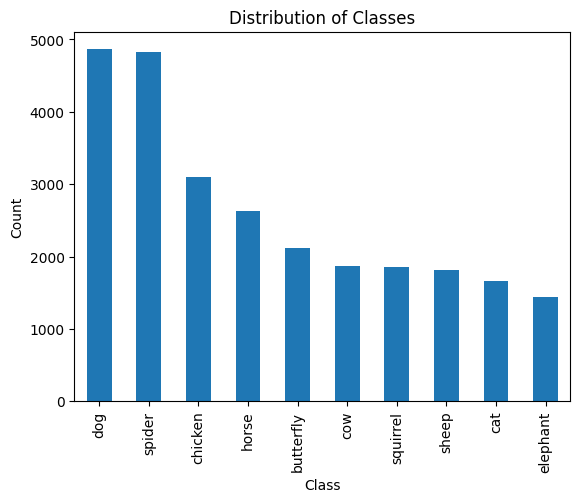

In [13]:
# Візуалізація розподілу класів
class_counts.plot(kind='bar')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

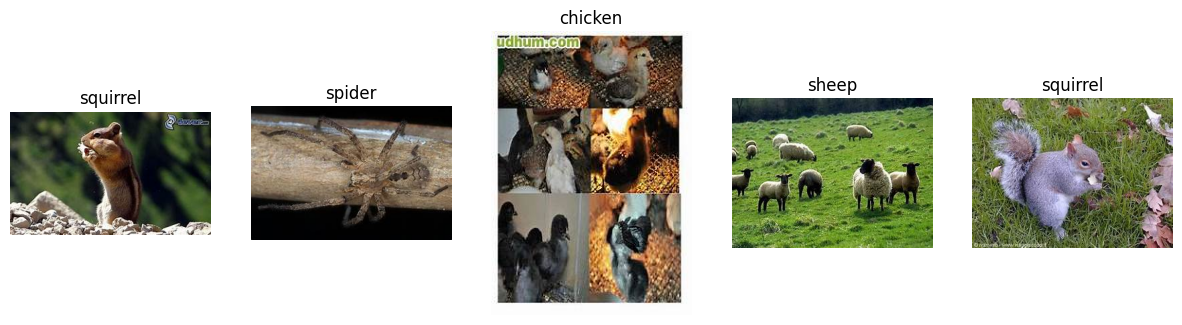

In [16]:
# Функція для відображення випадкових зображень
def display_random_images(df, n=5):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        class_name = random.choice(df['label'].unique())
        image_path = df[df['label'] == class_name].sample(1)['image_path'].values[0]
        
        plt.subplot(1, n, i + 1)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.show()

# Відображення 5 випадкових зображень
display_random_images(df, n=5)

In [18]:
# Функція для отримання розмірів зображень
def get_image_sizes(df):
    sizes = []
    for path in df['image_path']:
        img = Image.open(path)
        sizes.append(img.size)  # (width, height)
    return sizes

# Отримання розмірів зображень
sizes = get_image_sizes(df)

# Перетворення у DataFrame для аналізу
sizes_df = pd.DataFrame(sizes, columns=['width', 'height'])

# Огляд статистики
print(sizes_df.describe())

              width        height
count  26179.000000  26179.000000
mean     320.038810    252.630162
std      196.935326    148.403298
min       60.000000     57.000000
25%      300.000000    200.000000
50%      300.000000    225.000000
75%      300.000000    300.000000
max     6720.000000   6000.000000
